<a href="https://colab.research.google.com/github/MOOwuttichai/BSC_DPDM2023/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Start

In [103]:
import numpy as np
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')
shopping_data = pd.read_csv("/content/drive/MyDrive/BSC-dpdm23_flie/customer_shopping_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
shopping_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


# ข้อมูลบางส่วนมีค่าตัวแปรบางตัวที่ไม่ทราบค่า (Missing Data)

ตรวจสอบค่าก่อน missing

In [105]:
shopping_data.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [106]:
shopping_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


##เราจะลบ price ของ records ที่เป็น cothing,cash,Metrocity เพื่อจะจำลอง missing data

ทำให้ price เป็น missing

In [107]:
shopping_new = shopping_data[shopping_data['category']=='Clothing']
shopping_new2=shopping_new[shopping_new['payment_method']=='Cash']
shopping_new3 = shopping_new2[shopping_new2['shopping_mall']=='Metrocity']
shopping_new3

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,300.08,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,300.08,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,900.24,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,300.08,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,600.16,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,1200.32,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,900.24,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,300.08,Cash,25/02/2023,Metrocity


In [108]:
hasmissing = shopping_data[(shopping_data['category']=='Clothing') &
              (shopping_data['payment_method']=='Cash') &
              (shopping_data['shopping_mall']=='Metrocity')]

In [109]:
hasmissing['price']= np.nan #ทำให้ค่ากลายเป็น missing

<ipython-input-109-e70a23699fed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hasmissing['price']= np.nan #ทำให้ค่ากลายเป็น missing


เเยกค่าที่ไม่ทำ missing value

In [110]:
hasmissing

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,NaN,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,NaN,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,NaN,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,NaN,Cash,25/02/2023,Metrocity


In [111]:
nonmissing=shopping_data[(shopping_data['category']!='Clothing') |
              (shopping_data['payment_method']!='Cash') |
              (shopping_data['shopping_mall']!='Metrocity')]

เอาค่ากลับมารวม

In [112]:
new_shopping_data = pd.concat([hasmissing,nonmissing]).reset_index()
new_shopping_data.shape

(99457, 11)

## Example

In [113]:
new_shopping_data

,index,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
1,382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
2,446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
3,531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
4,647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...,...
99452,99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [114]:
new_shopping_data.isnull().any()

index             False
invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price              True
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [115]:
new_shopping_data.describe()

,index,age,quantity,price
count,99457.000000,99457.000000,99457.000000,97173.000000
mean,49728.000000,43.427089,3.003429,684.423873
std,28710.907199,14.990054,1.413025,949.438067
min,0.000000,18.000000,1.000000,5.230000
25%,24864.000000,30.000000,2.000000,40.660000
50%,49728.000000,43.000000,3.000000,203.300000
75%,74592.000000,56.000000,4.000000,1200.320000
max,99456.000000,69.000000,5.000000,5250.000000


## Fix

### 1.ignore (ลบออก)

###Quiz
* data หายไปกี่ %
* mean data รวมหลังจากเเก้ missing เป็นค่าเท่าไร

In [116]:
len(new_shopping_data)

99457

In [117]:
dropna_data=new_shopping_data.dropna()

In [118]:
dropna_data

,index,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2284,0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
2285,1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2286,3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
2287,4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
2288,5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
...,...,...,...,...,...,...,...,...,...,...,...
99452,99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [119]:
100*(len(new_shopping_data)-len(dropna_data))/len(new_shopping_data)

2.2964698311833254

In [120]:
dropna_data.describe()

,index,age,quantity,price
count,97173.000000,97173.000000,97173.000000,97173.000000
mean,49719.605158,43.421671,3.003931,684.423873
std,28719.460446,14.990459,1.413123,949.438067
min,0.000000,18.000000,1.000000,5.230000
25%,24848.000000,30.000000,2.000000,40.660000
50%,49715.000000,43.000000,3.000000,203.300000
75%,74596.000000,56.000000,4.000000,1200.320000
max,99456.000000,69.000000,5.000000,5250.000000


### 2.เติมด้วย unknown *เราจะเติมกับข้อมูล categorical

### 3. เติมค่าด้วย missing value

In [121]:
fillna_data = new_shopping_data.fillna(dropna_data['price'].mean())

In [122]:
fillna_data

,index,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,2,I127801,C266599,Male,20,Clothing,1,684.423873,Cash,9/11/2021,Metrocity
1,382,I591015,C286181,Female,69,Clothing,1,684.423873,Cash,12/9/2021,Metrocity
2,446,I423124,C109593,Female,66,Clothing,1,684.423873,Cash,7/1/2023,Metrocity
3,531,I223795,C280596,Male,40,Clothing,3,684.423873,Cash,26/12/2022,Metrocity
4,647,I891465,C175833,Female,19,Clothing,1,684.423873,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...,...
99452,99452,I219422,C441542,Female,45,Souvenir,5,58.650000,Credit Card,21/09/2022,Kanyon
99453,99453,I325143,C569580,Male,27,Food & Beverage,2,10.460000,Cash,22/09/2021,Forum Istanbul
99454,99454,I824010,C103292,Male,63,Food & Beverage,2,10.460000,Debit Card,28/03/2021,Metrocity
99455,99455,I702964,C800631,Male,56,Technology,4,4200.000000,Cash,16/03/2021,Istinye Park


In [123]:
fillna_data.describe()

,index,age,quantity,price
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,49728.000000,43.427089,3.003429,684.423873
std,28710.907199,14.990054,1.413025,938.472859
min,0.000000,18.000000,1.000000,5.230000
25%,24864.000000,30.000000,2.000000,45.450000
50%,49728.000000,43.000000,3.000000,203.300000
75%,74592.000000,56.000000,4.000000,1200.320000
max,99456.000000,69.000000,5.000000,5250.000000


### 4.fill ด้วยกลุ่ม

* mean หลังเติมด้วยค่าเฉลี่ย Clothing
* mean หลังเติมด้วยค่าเฉลี่ย Cash
* mean หลังเติมด้วยค่าเฉลี่ย Metrocity
* mean หลังเติมด้วยค่าเฉลี่ย Cash & Metrocity

In [124]:
C_M =new_shopping_data[(new_shopping_data['payment_method'] == 'Cash') &
                  (new_shopping_data['shopping_mall'] == 'Metrocity')]

In [125]:
C_M['price'].mean()

577.9630292559318

In [126]:
fillna_data3=new_shopping_data.fillna(C_M['price'].mean())

In [127]:
fillna_data3

,index,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,2,I127801,C266599,Male,20,Clothing,1,577.963029,Cash,9/11/2021,Metrocity
1,382,I591015,C286181,Female,69,Clothing,1,577.963029,Cash,12/9/2021,Metrocity
2,446,I423124,C109593,Female,66,Clothing,1,577.963029,Cash,7/1/2023,Metrocity
3,531,I223795,C280596,Male,40,Clothing,3,577.963029,Cash,26/12/2022,Metrocity
4,647,I891465,C175833,Female,19,Clothing,1,577.963029,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...,...
99452,99452,I219422,C441542,Female,45,Souvenir,5,58.650000,Credit Card,21/09/2022,Kanyon
99453,99453,I325143,C569580,Male,27,Food & Beverage,2,10.460000,Cash,22/09/2021,Forum Istanbul
99454,99454,I824010,C103292,Male,63,Food & Beverage,2,10.460000,Debit Card,28/03/2021,Metrocity
99455,99455,I702964,C800631,Male,56,Technology,4,4200.000000,Cash,16/03/2021,Istinye Park


In [128]:
fillna_data3.describe()

,index,age,quantity,price
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,49728.000000,43.427089,3.003429,681.979032
std,28710.907199,14.990054,1.413025,938.608338
min,0.000000,18.000000,1.000000,5.230000
25%,24864.000000,30.000000,2.000000,45.450000
50%,49728.000000,43.000000,3.000000,203.300000
75%,74592.000000,56.000000,4.000000,1200.320000
max,99456.000000,69.000000,5.000000,5250.000000


# ข้อมูลมีความซ้ำซ้อน (Duplicate Data)

###สร้าง data Duplicate Data

In [129]:
willbedup = shopping_data[(shopping_data['category']=='Clothing') &
              (shopping_data['payment_method']=='Cash') &
              (shopping_data['shopping_mall']=='Metrocity')]

In [130]:
new_shopping_dup = pd.concat([shopping_data,willbedup])

In [131]:
new_shopping_dup.describe()

,age,quantity,price
count,101741.000000,101741.000000,101741.000000
mean,43.432264,3.002949,693.871800
std,14.989665,1.412931,933.210127
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,300.080000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [132]:
new_shopping_dup=new_shopping_dup.sort_values(by='invoice_date') #เรียงข้อมูลตามเวลา

## Example

In [133]:
new_shopping_dup[new_shopping_dup.duplicated()] #เช็กว่าข้อมูลไหนซ้ำ

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
30645,I235671,C196703,Female,45,Clothing,2,600.16,Cash,1/1/2021,Metrocity
27812,I836951,C382440,Male,54,Clothing,3,900.24,Cash,1/1/2021,Metrocity
67018,I122424,C970402,Female,30,Clothing,1,300.08,Cash,1/1/2022,Metrocity
52134,I740632,C283467,Female,49,Clothing,5,1500.40,Cash,1/1/2022,Metrocity
32519,I341543,C754279,Female,53,Clothing,5,1500.40,Cash,1/1/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
82563,I301995,C734886,Female,67,Clothing,2,600.16,Cash,9/8/2022,Metrocity
63360,I180399,C286433,Female,31,Clothing,3,900.24,Cash,9/9/2021,Metrocity
90298,I422962,C183016,Female,55,Clothing,2,600.16,Cash,9/9/2021,Metrocity
97787,I275007,C259969,Male,61,Clothing,2,600.16,Cash,9/9/2022,Metrocity


## Fix

In [134]:
new_shopping_dup.drop_duplicates().duplicated().any()

False

###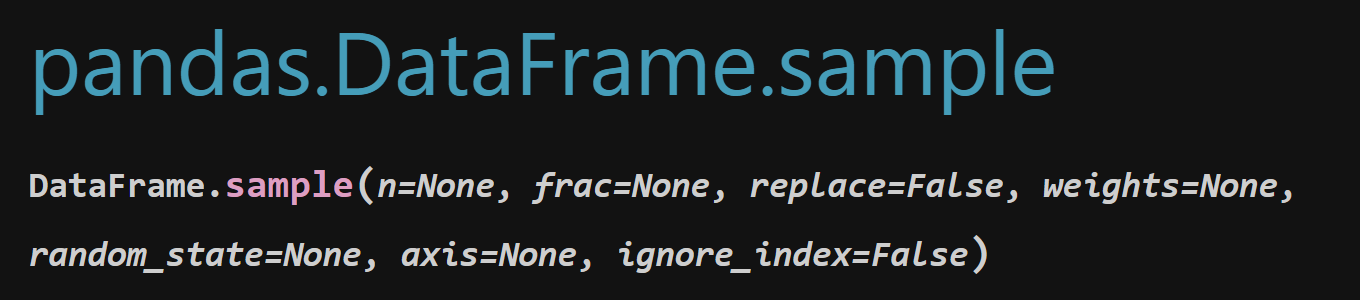 ข้อมูลบางตัวในชุดข้อมูลมีลักษณะผิดปกติหรือแตกต่างจากข้อมูลส่วนใหญ่ (Outlier)

In [135]:
from matplotlib import pyplot as plt

## Example

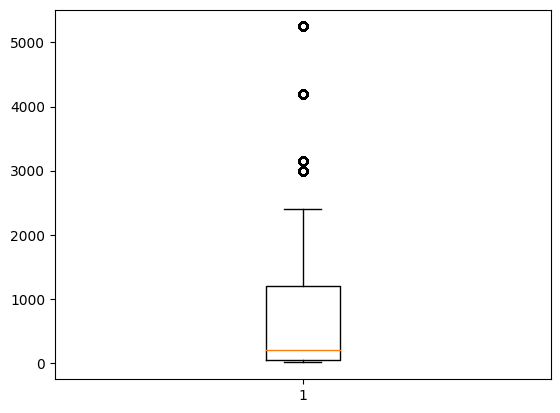

In [136]:
ret = plt.boxplot(shopping_data['price'])

## Fix

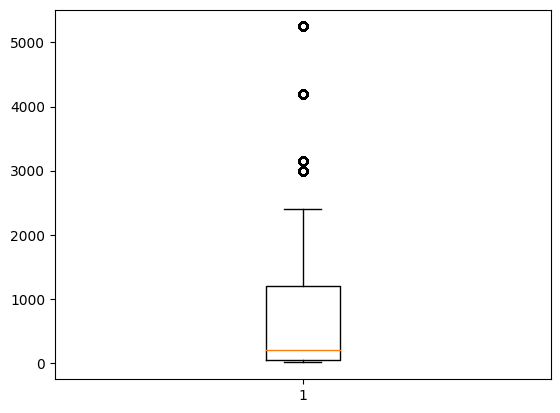

In [137]:
ret = plt.boxplot(shopping_data['price'])

In [138]:
ret

{'whiskers': [<matplotlib.lines.Line2D at 0x7d874283a860>,
 'caps': [<matplotlib.lines.Line2D at 0x7d874283ada0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d874283a5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d874283b310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d874283b5b0>],
 'means': []}

In [139]:
ret['fliers'][0].get_ydata().shape

(5024,)

In [140]:
ret['whiskers'][0].get_ydata() #หาเส้นmin เเละ IQR-min

array([45.45,  5.23])

In [141]:
ret['whiskers'][1].get_ydata() #หาเส้นmax เเละ IQR-max

array([1200.32, 2400.68])

In [142]:
ret['whiskers'][1].get_ydata()[1]

2400.68

In [143]:
no_outline=shopping_data[shopping_data['price'] <= 2400.68]

{'whiskers': [<matplotlib.lines.Line2D at 0x7d87428a6380>,
 'caps': [<matplotlib.lines.Line2D at 0x7d87428a67a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d87428a60e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d87428a6ce0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d87428a6f80>],
 'means': []}

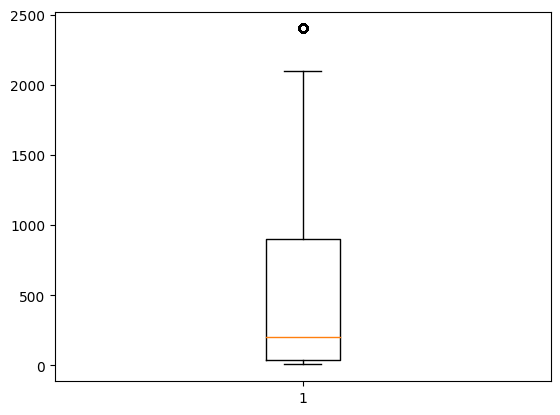

In [144]:
 plt.boxplot(no_outline['price'])

# ค่าตัวแปรบางตัวที่ไม่ถูกต้อง (Erroneous Data)

In [145]:
shopping_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [146]:
shopping_data.sort_values(by='age')

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
69089,I907811,C167489,Male,18,Shoes,3,1800.51,Debit Card,12/9/2022,Kanyon
95060,I128262,C687788,Male,18,Toys,4,143.36,Cash,2/5/2021,Mall of Istanbul
78728,I280590,C142284,Female,18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul
55784,I210628,C525437,Female,18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
2443,I115916,C338582,Male,18,Shoes,5,3000.85,Debit Card,23/08/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
66267,I433176,C202678,Male,69,Toys,5,179.20,Credit Card,27/03/2021,Istinye Park
66279,I213234,C176169,Female,69,Shoes,2,1200.34,Credit Card,7/10/2021,Viaport Outlet
85428,I117055,C208685,Female,69,Souvenir,2,23.46,Cash,15/09/2022,Metrocity
66133,I288825,C345511,Female,69,Clothing,1,300.08,Credit Card,23/07/2021,Mall of Istanbul


เเก้ค่า Age ของ invoice_no = [I280590,I210628] เป็น less than 18

In [147]:
shopping_data[(shopping_data['invoice_no']=='I280590') | (shopping_data['invoice_no']=='I210628')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


In [148]:
shopping_data.loc[(55784,78728),'age'] = 'less than 18'

In [149]:
shopping_data[(shopping_data['invoice_no']=='I280590') | (shopping_data['invoice_no']=='I210628')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,less than 18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,less than 18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


In [150]:
shopping_data.describe()

,quantity,price
count,99457.000000,99457.000000
mean,3.003429,689.256321
std,1.413025,941.184567
min,1.000000,5.230000
25%,2.000000,45.450000
50%,3.000000,203.300000
75%,4.000000,1200.320000
max,5.000000,5250.000000


## Example

### ทดลองประมวลผล column

In [161]:
shopping_data(['age']).mean()

TypeError: ignored

### สมมติว่า Error บอกว่าไม่สามารถประมวลผลค่า 'less than 18'

### หาว่าค่า Error อยู่ที่ไหน

In [157]:
shopping_data[shopping_data.eq('less than 18').any(1)]

<ipython-input-157-4744250e9fad>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  shopping_data[shopping_data.eq('less than 18').any(1)]


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,less than 18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,less than 18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


## Fix

### เเทนค่าด้วยค่าที่เหมาะสม

In [158]:
shopping_data['age']=shopping_data['age'].replace('less than 18',17)

In [159]:
shopping_data[shopping_data.eq('less than 18').any(1)]

<ipython-input-159-4744250e9fad>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  shopping_data[shopping_data.eq('less than 18').any(1)]


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [160]:
shopping_data[(shopping_data['invoice_no']=='I280590') | (shopping_data['invoice_no']=='I210628')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,17,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,17,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


# ข้อมูลมีค่าตัวแปรไม่สอดคล้องซึ่งกันและกัน (Inconsistent)

## Example

เกิดเมื่อรวมข้อมูลจากหลายเเหล่งเเล้ว ค่าใน 2 Columns ไม่เป็นไป
ในทางเดียวกันเช่น column อายุไม่ตรงกับ column วันเกิดหลังจากคำนวณอายุเเล้ว

## Fix
เก็บไว้เฉพาะ column ที่ถูก

# Data Intergration (การรวมข้อมูลจากหลายเเหล่ง)

## 1.รวมเเกน y (เพิ่ม row - เพิ่ม Data)
ex. olddata and newdata

In [165]:
Sep_df = pd.read_excel('/content/drive/MyDrive/Dataviz_23data/ผลการใช้จ่ายงบประมาณรายจ่ายของจังหวัดเชียงใหม่ ประจำปีงบประมาณ พ.ศ. 2565 เดือนกันยายน 2565.xlsx', header=8,skipfooter=26)
Octo_df = pd.read_excel('/content/drive/MyDrive/Dataviz_23data/ผลการใช้จ่ายงบประมาณรายจ่ายของจังหวัดเชียงใหม่ ประจำปีงบประมาณ พ.ศ. 2565 เดือนตุลาคม 2565.xlsx', header=9,skipfooter=27)
#header=x ให้หัวตาราง เป็น row ที่ x ของ excel
#skipfooter=x ตัดrowเป็นจำนวนที่ x ตาม index เริ่มจากล่างขึ้นบน

In [166]:
sep_df=Sep_df.iloc[-2:,:15]
sep_df['เดือน-ปี'] = len(sep_df)*['sep-65']
sep_df

,รายการ,งบประมาณ,สำรองเงินมีหนี้,PO,เบิกจ่าย,ร้อยละ\nเบิกจ่าย,เป้า\nหมาย Q4,*/- เป้าหมาย,การใช้จ่าย (PO+เบิกจ่าย),ร้อยละ\nการใช้จ่าย,เป้า\nหมาย Q4.1,*/- เป้าหมาย.1,คงเหลือ\nหลังหักใช้จ่าย,ลำดับเบิกจ่าย,ลำดับ\nใช้จ่าย,เดือน-ปี
2,ประจำ,1.892013e+10,7.925745e+07,7.131600e+07,1.880196e+10,99.375405,98.0,1.375405,1.895253e+10,100.171242,100.0,0.171242,-3.239918e+07,NaN,NaN,sep-65
3,ลงทุน,9.605258e+09,2.683430e+08,1.119320e+09,8.201965e+09,85.390363,75.0,10.390363,9.589628e+09,99.837275,100.0,-0.162725,1.563013e+07,6.0,15.0,sep-65


In [167]:
oct_df= Octo_df.iloc[-2:,:15]
oct_df['เดือน-ปี'] = len(oct_df)*['Octo-65']
oct_df

,รายการ,งบประมาณ,สำรองเงินมีหนี้,PO,เบิกจ่าย,ร้อยละ\nเบิกจ่าย,เป้า\nหมาย Q1,*/- เป้าหมาย,การใช้จ่าย (PO+เบิกจ่าย),ร้อยละ\nการใช้จ่าย,เป้า\nหมาย Q1.1,*/- เป้าหมาย.1,คงเหลือ\nหลังหักใช้จ่าย,ลำดับเบิกจ่าย,ลำดับ\nใช้จ่าย,เดือน-ปี
2,ประจำ,6822.811789,NaN,12.706842,3984.779058,58.403766,35.0,23.403766,3997.485900,58.590007,35.33,23.260007,2825.325889,NaN,NaN,Octo-65
3,ลงทุน,6180.211723,NaN,457.295806,1291.209026,20.892634,19.0,1.892634,1748.504832,28.291989,28.96,-0.668011,4431.706890,4.0,6.0,Octo-65


In [168]:
sep_oct_df = pd.concat([sep_df,oct_df])

In [169]:
sep_oct_df

,รายการ,งบประมาณ,สำรองเงินมีหนี้,PO,เบิกจ่าย,ร้อยละ\nเบิกจ่าย,เป้า\nหมาย Q4,*/- เป้าหมาย,การใช้จ่าย (PO+เบิกจ่าย),ร้อยละ\nการใช้จ่าย,เป้า\nหมาย Q4.1,*/- เป้าหมาย.1,คงเหลือ\nหลังหักใช้จ่าย,ลำดับเบิกจ่าย,ลำดับ\nใช้จ่าย,เดือน-ปี,เป้า\nหมาย Q1,เป้า\nหมาย Q1.1
2,ประจำ,1.892013e+10,7.925745e+07,7.131600e+07,1.880196e+10,99.375405,98.0,1.375405,1.895253e+10,100.171242,100.0,0.171242,-3.239918e+07,NaN,NaN,sep-65,NaN,NaN
3,ลงทุน,9.605258e+09,2.683430e+08,1.119320e+09,8.201965e+09,85.390363,75.0,10.390363,9.589628e+09,99.837275,100.0,-0.162725,1.563013e+07,6.0,15.0,sep-65,NaN,NaN
2,ประจำ,6.822812e+03,NaN,1.270684e+01,3.984779e+03,58.403766,NaN,23.403766,3.997486e+03,58.590007,NaN,23.260007,2.825326e+03,NaN,NaN,Octo-65,35.0,35.33
3,ลงทุน,6.180212e+03,NaN,4.572958e+02,1.291209e+03,20.892634,NaN,1.892634,1.748505e+03,28.291989,NaN,-0.668011,4.431707e+03,4.0,6.0,Octo-65,19.0,28.96


## 2.รวมเเกน x (เพิ่ม column - feature)
ex.เมื่อต้องการขยายความ data

In [187]:
project_df = pd.read_csv('/content/drive/MyDrive/Dataviz_23data/opendata_project-2.csv')
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


In [188]:
unit_df = pd.read_csv('/content/drive/MyDrive/Dataviz_23data/opendata_unittype-2.csv')
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11


In [189]:
project_df[project_df['project_id']=='5e44bbf82f2cb30012cefe44']

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
4981,22500.0,5e44bbf82f2cb30012cefe44,M Village Buengrai1-Sriracha,เอ็ม วิลเลจ บึงไร่1-ศรีราชา,1,Detached House,บ้าน,2400000.0,developer_6243,NaN,...,1.0,1.0,1.0,1.0,2020-02-13 10:01:12,2022-01-01 07:00:00,2022-06-21 15:00:08,baania,https://baania.com/th/project/เอ็ม-วิลเลจ-บึงไ...,2023-06-11
22791,232.0,5e44bbf82f2cb30012cefe44,M Village Buengrai1-Sriracha,เอ็ม วิลเลจ บึงไร่1-ศรีราชา,20000,Twin house,บ้านแฝด,2400000.0,developer_6243,NaN,...,1.0,1.0,1.0,1.0,2020-02-13 10:01:12,2022-01-01 07:00:00,2022-06-21 15:00:08,baania,https://baania.com/th/project/เอ็ม-วิลเลจ-บึงไ...,2023-06-11


In [190]:
project_df[project_df.duplicated(subset='project_id')].sort_values('project_id').head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
22791,232.0,5e44bbf82f2cb30012cefe44,M Village Buengrai1-Sriracha,เอ็ม วิลเลจ บึงไร่1-ศรีราชา,20000,Twin house,บ้านแฝด,2400000.0,developer_6243,NaN,...,1.0,1.0,1.0,1.0,2020-02-13 10:01:12,2022-01-01 07:00:00,2022-06-21 15:00:08,baania,https://baania.com/th/project/เอ็ม-วิลเลจ-บึงไ...,2023-06-11
6350,1521.0,5e53752bb33a1500123c66db,Baan Pruksa Airport-Maliwan,บ้านพฤกษา แอร์พอร์ต-มะลิวัลย์,1,Detached House,บ้าน,1790000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,1.0,1.0,1.0,1.0,2020-02-24 14:03:07,NaN,2022-02-10 14:30:04,baania,https://baania.com/th/project/บ้านพฤกษา-แอร์พอ...,2023-06-11
11322,8934.0,5e53752bb33a1500123c66db,Baan Pruksa Airport-Maliwan,บ้านพฤกษา แอร์พอร์ต-มะลิวัลย์,20000,Twin house,บ้านแฝด,1790000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,1.0,1.0,1.0,1.0,2020-02-24 14:03:07,NaN,2022-02-10 14:30:04,baania,https://baania.com/th/project/บ้านพฤกษา-แอร์พอ...,2023-06-11
20504,6170.0,5e537aacb33a1500123c66ee,NC on Green Palm Park,เอ็น ซี ออน กรีน ปาล์ม พาร์ค,3,Townhome,ทาวน์โฮม,1900000.0,developer_1263,N.C. Housing Public Company Limited,...,1.0,NaN,1.0,1.0,2020-02-24 14:26:36,NaN,2021-10-21 18:00:10,baania,https://baania.com/th/project/เอ็น-ซี-ออน-กรีน...,2023-06-11
10048,17218.0,5e538f59b33a1500123c6739,Supalai Bella Rama 2-Phanthainorasing,ศุภาลัย เบลล่า พระราม 2-พันท้ายนรสิงห์,20000,Twin house,บ้านแฝด,2090000.0,developer_97,"SUPALAI PUB CO., LTD.",...,1.0,1.0,NaN,1.0,2020-02-24 15:54:49,2022-01-01 07:00:00,2022-11-14 16:00:04,baania,https://baania.com/th/project/ศุภาลัย-เบลล่า-พ...,2023-06-11


In [191]:
project_df = project_df.drop_duplicates(subset='project_id',keep='last')#drop_duplicates การตัดข้อมูลที่ซ้ำกันทิ้งโดยจะตัดตัวหลังจากหลังเห็นตัวซ้ำ (subset = เลือกcolunm, keep =เก็บค่าตรงไหน (last สุดท้าย))
unit_df['province_en'] = unit_df['project_id'].map(project_df.set_index('project_id')['province_name_en'])

In [192]:
unit_df

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,province_en
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,Bangkok
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,Nakhon Ratchasima
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,Rayong
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,Nakhon Si Thammarat
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,Bangkok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,880000.0,...,NaN,NaN,NaN,NaN,2022-10-19 11:30:05,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,Nakhon Ratchasima
43370,23721,unittype_15644,project_6109,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,45.0,140.0,2400000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:24:19,2020-10-14 23:03:19,baania,https://baania.com/th/project/บ้านเต็มสิริ-1-6...,2023-06-11,Bangkok
43371,31551,unittype_21385,project_8392,อาคารพาณิชย์สี่ชั้น type B,4,Commercial,อาคารพาณิชย์,34.0,192.0,13000000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:19:31,2020-10-14 00:38:09,baania,https://baania.com/th/project/พระเงิน-เพลส-839...,2023-06-11,Nonthaburi
43372,29837,unittype_26243,project_10566,ทาวน์โฮมสามชั้น,3,Townhome,ทาวน์โฮม,NaN,191.0,2600000.0,...,1.0,NaN,NaN,NaN,2020-12-04 10:47:10,2020-10-16 16:33:56,baania,https://baania.com/th/project/บ้านไทยวิลล่า-ศร...,2023-06-11,Chon Buri


# Data Reduction

## Reduce number of data (Y-axis) - Sampling

[เครื่องมือที่ช่วย sampling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)



##sampling เเบบกำหนดค่านาฬิกา

In [194]:
shopping_data.sample(random_state=6)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
81034,I209459,C312307,Female,18,Souvenir,1,11.73,Cash,13/05/2021,Cevahir AVM


##เเบบกำหนดค่า n

In [195]:
shopping_data.sample(10,random_state=6)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
81034,I209459,C312307,Female,18,Souvenir,1,11.73,Cash,13/05/2021,Cevahir AVM
91838,I351059,C292856,Male,41,Clothing,2,600.16,Credit Card,9/7/2021,Metropol AVM
20458,I323617,C325754,Female,24,Clothing,2,600.16,Credit Card,1/2/2022,Istinye Park
73343,I104653,C209092,Male,62,Toys,5,179.20,Cash,19/11/2022,Cevahir AVM
70406,I804767,C196027,Female,65,Clothing,3,900.24,Credit Card,28/03/2022,Istinye Park
65247,I137393,C726791,Female,37,Food & Beverage,3,15.69,Credit Card,19/10/2022,Kanyon
49419,I650563,C283975,Male,28,Clothing,3,900.24,Debit Card,11/6/2021,Mall of Istanbul
90371,I109001,C901685,Female,36,Toys,3,107.52,Credit Card,15/09/2022,Istinye Park
98492,I394097,C307872,Male,29,Food & Beverage,1,5.23,Credit Card,10/11/2022,Cevahir AVM
11309,I163506,C223150,Male,34,Food & Beverage,1,5.23,Cash,17/10/2021,Kanyon


##กำหนดเป็น %

In [196]:
shopping_data.sample(frac=0.2,random_state=6)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
81034,I209459,C312307,Female,18,Souvenir,1,11.73,Cash,13/05/2021,Cevahir AVM
91838,I351059,C292856,Male,41,Clothing,2,600.16,Credit Card,9/7/2021,Metropol AVM
20458,I323617,C325754,Female,24,Clothing,2,600.16,Credit Card,1/2/2022,Istinye Park
73343,I104653,C209092,Male,62,Toys,5,179.20,Cash,19/11/2022,Cevahir AVM
70406,I804767,C196027,Female,65,Clothing,3,900.24,Credit Card,28/03/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
75991,I189802,C338933,Female,63,Clothing,3,900.24,Credit Card,28/06/2021,Mall of Istanbul
85083,I121218,C125359,Male,42,Clothing,3,900.24,Debit Card,14/10/2021,Metrocity
55086,I365478,C904439,Female,62,Clothing,4,1200.32,Credit Card,19/01/2023,Viaport Outlet
1096,I145120,C293612,Female,60,Clothing,4,1200.32,Debit Card,4/2/2023,Metrocity


##sampling เเบบใส่คืน

In [201]:
sam_no_replace=shopping_data.sample(frac=0.2,random_state=6) #เเบบไม่ใส่คืน
sam_no_replace.duplicated().any()#เช็กค่าซ้ำ

False

In [199]:
sam_replace=shopping_data.sample(frac=0.2,replace=True,random_state=6) #เเบบใส่คืน
sam_replace.duplicated().any()#เช็กค่าซ้ำ

True

##ใช้เเบบเพิ่ม data ก็ได้

In [200]:
sam_replace_120=shopping_data.sample(frac=1.2,replace=True,random_state=6) #เเบบใส่คืนเเต่เป็นการเพิ่มข้อมูล
sam_replace_120.shape

(119348, 10)

## Reduce dimenson of data (x-axis) - PCA & Stats

ดูในPCA